In [120]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

In [121]:
load_dotenv()

model = ChatGroq(model = "qwen/qwen3-32b")

In [122]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    score : int

In [123]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [124]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [125]:
def evaluate_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    content = state['content']
    
    prompt = f'Here is the title: {title}, outline:{outline} and content: {content} of the blog, give me a rating out of 100 of the blog based on the outline provided and i want only the score dont give me reasoning only the score in 2 lines'
    score = model.invoke(prompt).content
    state['score'] = score
    return state

In [126]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluate_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

workflow = graph.compile()



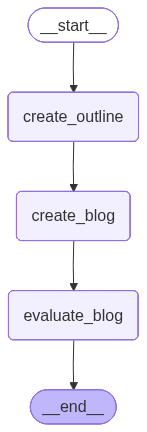

In [127]:
graph.compile()

In [ ]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state['title'])

In [ ]:
print(final_state['outline'])

<think>
Okay, I need to create a detailed blog outline on the "Rise of AI in India." Let me start by breaking down the key components that should be included. First, an introduction to set the context. Then, maybe some background on AI in India, like when it started gaining traction. 

I should consider the current state of AI in India—what sectors are adopting it, like healthcare, agriculture, etc. Also, government initiatives are important here. The Indian government has been promoting AI through various policies and programs, so that's a section to include.

Next, the economic impact. How is AI contributing to India's economy? Job creation, GDP growth, maybe some stats there. Then the challenges, like infrastructure gaps, data privacy issues, and ethical concerns. It's important to address both the positives and the hurdles.

Future trends? What's next for AI in India? Maybe AI in education, smart cities, or collaboration with global tech. Also, a conclusion to wrap it up and a call

In [ ]:
print(final_state['content'])

<think>
Okay, let's start by understanding the user's query. They want a detailed blog on the rise of AI in India using the provided outline. First, I need to make sure I follow the structure they outlined but also think about how to expand each section effectively. The user mentioned including government initiatives, economic impact, challenges, and future trends, so I'll need to cover those areas thoroughly.

I should start with an engaging introduction to hook the reader. Maybe a statistic or a thought-provoking statement about India's potential in AI. Then, moving into the historical context, it's important to mention when AI started gaining traction in India. I remember reading that research began in the 80s and 90s, so that's a good starting point.

For the current state, the user listed several sectors like healthcare, agriculture, and education. I need to find specific examples of startups or companies in these areas. For instance, in healthcare, SigTuple and Thyrocare are good

In [ ]:
print(final_state['score'])

<think>
Okay, let me start by understanding the user's request. They provided an outline for a blog titled "Rise of AI in India" and then wrote the blog content. Now they want me to rate the blog out of 100 based on the original outline. 

First, I need to compare the blog content with the outline to see how well it aligns. The outline includes sections like Introduction, Historical Context, Current Landscape, Economic Impact, Challenges, Future Trends, Conclusion, and a Call to Action. The blog seems to cover all these sections, so that's a good start.

Looking at each section in detail: The introduction sets the context with a hook and thesis. The historical context is covered with specific years and examples. The current landscape breaks down sectors like healthcare, agriculture, etc., and mentions government initiatives. The economic impact has stats and startup examples. Challenges address infrastructure, data privacy, and ethics. Future trends discuss climate, global collaboratio